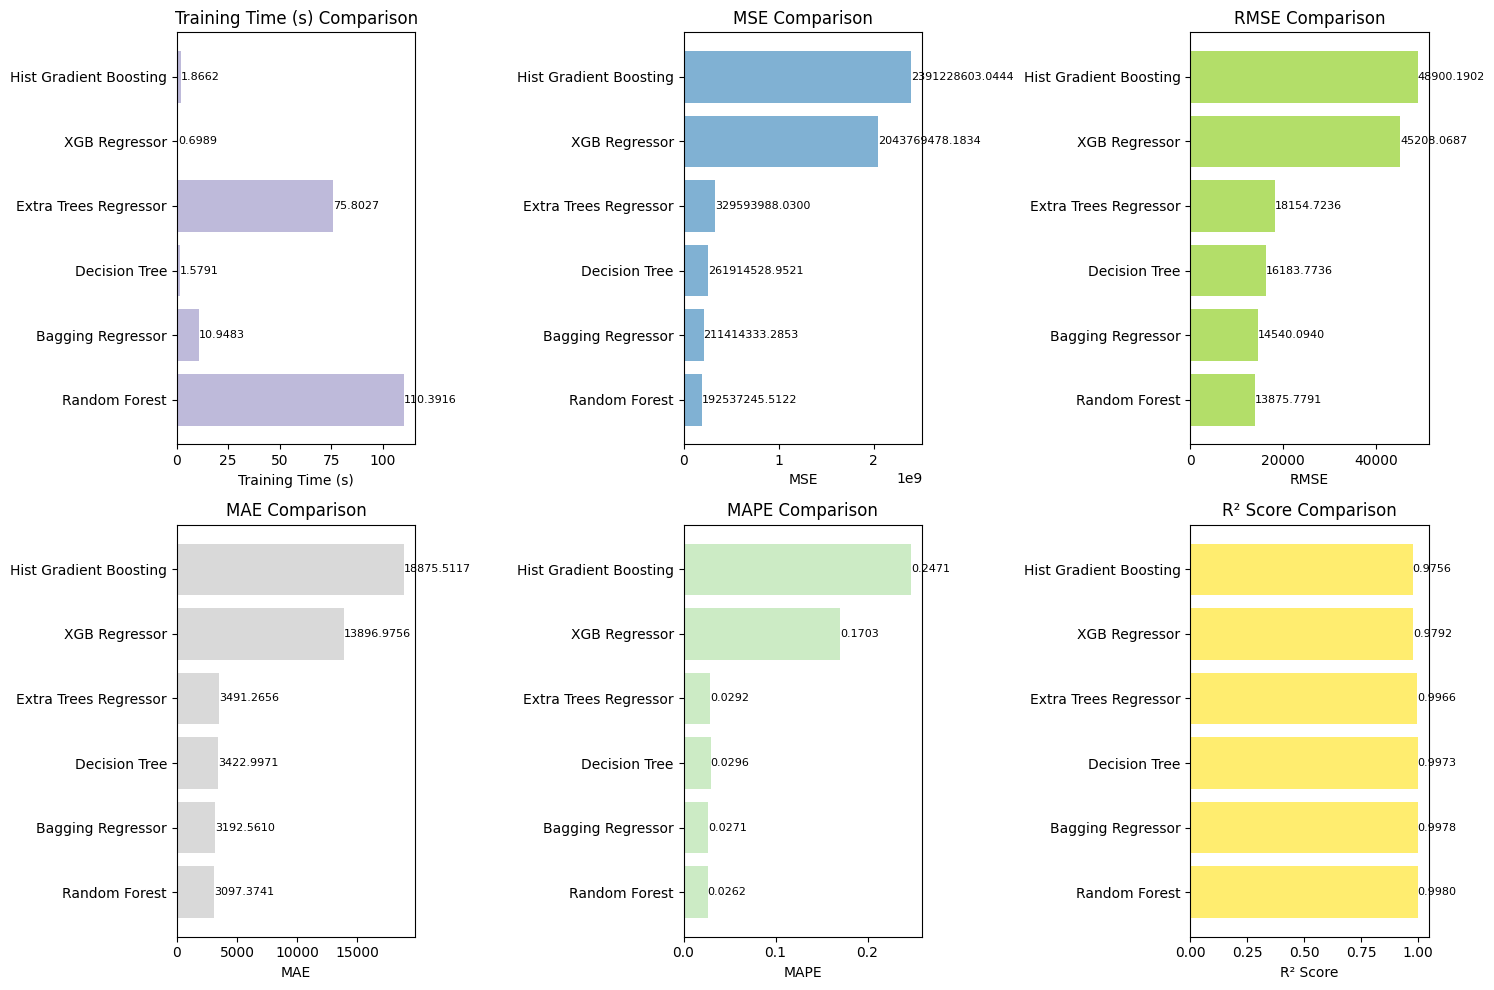


Detailed Model Performance Comparison:
                 Model  Training Time (s)          MSE         RMSE          MAE     MAPE  R² Score
         Random Forest         110.391615 1.925372e+08 13875.779096  3097.374055 0.026214  0.998039
     Bagging Regressor          10.948340 2.114143e+08 14540.093992  3192.561019 0.027136  0.997847
         Decision Tree           1.579095 2.619145e+08 16183.773631  3422.997115 0.029584  0.997333
 Extra Trees Regressor          75.802695 3.295940e+08 18154.723573  3491.265641 0.029174  0.996643
         XGB Regressor           0.698861 2.043769e+09 45208.068729 13896.975559 0.170298  0.979185
Hist Gradient Boosting           1.866185 2.391229e+09 48900.190215 18875.511679 0.247135  0.975646


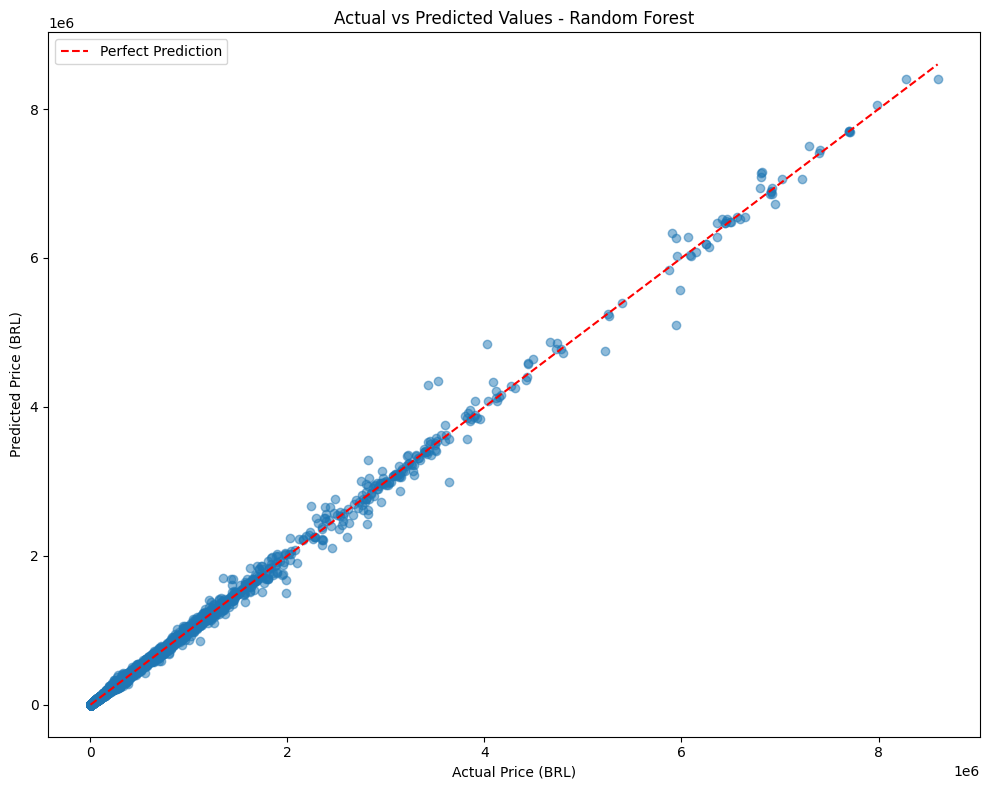


Model Performance Analysis:

Random Forest:
  Training Time: 110.3916 seconds
  MSE: 192537245.5122
  RMSE: 13875.7791
  MAE: 3097.3741
  MAPE: 0.0262
  R² Score: 0.9980

Bagging Regressor:
  Training Time: 10.9483 seconds
  MSE: 211414333.2853
  RMSE: 14540.0940
  MAE: 3192.5610
  MAPE: 0.0271
  R² Score: 0.9978

Decision Tree:
  Training Time: 1.5791 seconds
  MSE: 261914528.9521
  RMSE: 16183.7736
  MAE: 3422.9971
  MAPE: 0.0296
  R² Score: 0.9973

Extra Trees Regressor:
  Training Time: 75.8027 seconds
  MSE: 329593988.0300
  RMSE: 18154.7236
  MAE: 3491.2656
  MAPE: 0.0292
  R² Score: 0.9966

XGB Regressor:
  Training Time: 0.6989 seconds
  MSE: 2043769478.1834
  RMSE: 45208.0687
  MAE: 13896.9756
  MAPE: 0.1703
  R² Score: 0.9792

Hist Gradient Boosting:
  Training Time: 1.8662 seconds
  MSE: 2391228603.0444
  RMSE: 48900.1902
  MAE: 18875.5117
  MAPE: 0.2471
  R² Score: 0.9756


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import (
    mean_squared_error, 
    mean_absolute_error, 
    r2_score,
    mean_absolute_percentage_error
)
from xgboost import XGBRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

# Load the dataset
df = pd.read_csv('C:/Users/adity/z class work/RIC/Brazil fipe_2022.csv')

# Prepare the data
 #----------------- 
from sklearn.preprocessing import LabelEncoder

inputs = df.drop(['fipe_code', 'authentication', 'avg_price_brl', 'age_years'],axis='columns')
y = df['avg_price_brl']

le_month_of_reference = LabelEncoder()
le_brand = LabelEncoder()
le_model = LabelEncoder()
le_fuel = LabelEncoder()
le_gear = LabelEncoder()

inputs['month_of_reference_n']= le_month_of_reference.fit_transform(inputs['month_of_reference'])
inputs['brand_n']= le_brand.fit_transform(inputs['brand'])
inputs['model_n']= le_model.fit_transform(inputs['model'])
inputs['fuel_n']= le_fuel.fit_transform(inputs['fuel'])
inputs['gear_n']= le_gear.fit_transform(inputs['gear'])

X= inputs.drop(['month_of_reference', 'brand', 'model','fuel','gear'],axis='columns')
#    inputs_n.head()
#------------------------

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Bagging Regressor': BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Extra Trees Regressor': ExtraTreesRegressor(random_state=42),
    'XGB Regressor': XGBRegressor(random_state=42),
    'Hist Gradient Boosting': HistGradientBoostingRegressor(random_state=42)
}

# Store results
results = pd.DataFrame(columns=[
    'Model', 'Training Time (s)', 'MSE', 'RMSE', 'MAE', 'MAPE', 'R² Score'
])
predictions = {}

# Train and evaluate models
for name, model in models.items():
    # Time the training process
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    predictions[name] = y_pred
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results = pd.concat([results, pd.DataFrame({
        'Model': [name],
        'Training Time (s)': [training_time],
        'MSE': [mse],
        'RMSE': [rmse],
        'MAE': [mae],
        'MAPE': [mape],
        'R² Score': [r2]
    })], ignore_index=True)

# Sort results by R2 score (descending)
results = results.sort_values('R² Score', ascending=False).reset_index(drop=True)

# Visualization of Metrics
def create_multi_metric_plot(results, metric_columns):
    plt.figure(figsize=(15, 10))
    
    # Create a subplot for each metric
    for i, metric in enumerate(metric_columns, 1):
        plt.subplot(2, 3, i)
        bars = plt.barh(results['Model'], results[metric], color=plt.cm.Set3(i/len(metric_columns)))
        plt.title(f'{metric} Comparison')
        plt.xlabel(metric)
        
        # Add value labels to the end of each bar
        for bar in bars:
            width = bar.get_width()
            plt.text(width, bar.get_y() + bar.get_height()/2, 
                     f'{width:.4f}', 
                     ha='left', va='center', fontsize=8)
    
    plt.tight_layout()
    plt.savefig('model_performance_metrics.png')
    plt.show()

# Create the multi-metric visualization
create_multi_metric_plot(results, ['Training Time (s)', 'MSE', 'RMSE', 'MAE', 'MAPE', 'R² Score'])

# Print detailed results
print("\nDetailed Model Performance Comparison:")
print(results.to_string(index=False))

# Scatter plot of Actual vs Predicted for the best model
best_model = results.iloc[0]['Model']
plt.figure(figsize=(10, 8))
plt.scatter(y_test, predictions[best_model], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Price (BRL)')
plt.ylabel('Predicted Price (BRL)')
plt.title(f'Actual vs Predicted Values - {best_model}')
plt.legend()
plt.tight_layout()
plt.savefig('best_model_actual_vs_predicted.png')
plt.show()

# Print model analysis
print("\nModel Performance Analysis:")
for index, row in results.iterrows():
    print(f"\n{row['Model']}:")
    print(f"  Training Time: {row['Training Time (s)']:.4f} seconds")
    print(f"  MSE: {row['MSE']:.4f}")
    print(f"  RMSE: {row['RMSE']:.4f}")
    print(f"  MAE: {row['MAE']:.4f}")
    print(f"  MAPE: {row['MAPE']:.4f}")
    print(f"  R² Score: {row['R² Score']:.4f}")

#  part 3